### The Built-In Unknown Constraint Function in Emukit
Author: Zhe Liu (Massachusetts Institute of Technology) 
Date modified: Aug 17, 2020

Version: 0.1: tested with two 2D functions - Branin and Six-hump 
- The `UnknownConstraintBayesianOptimizationLoop` function only allows identical inputs for X and Xc 
- Full optimizaiton is supported, for exmaple using .run_loop or update with UserResultFunction

In [11]:
# import seaborn as sns
# sns.set(font_scale=1.1)
# sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
def plot_acquisitions(param_bound,  f_cons_acq, f_raw_acq, f_cons_pr, X, Xc, Xnew):
    xy = []
    n_steps = 30
    for x in np.linspace(param_bound[0][0], param_bound[0][1], n_steps):
        for y in np.linspace(param_bound[1][0], param_bound[1][1], n_steps):
            xy.append([x,y])
    z1 = f_cons_acq(np.array(xy))
    z2 = f_raw_acq(np.array(xy))
    z3 = f_cons_pr(np.array(xy))

    xc = np.array(xy)[:,0].reshape(n_steps, n_steps)
    yc = np.array(xy)[:,1].reshape(n_steps, n_steps)
    zc1 = np.array(z1).reshape(n_steps, n_steps)
    zc2 = np.array(z2).reshape(n_steps, n_steps)
    zc3 = np.array(z3).reshape(n_steps, n_steps)
    
    fontsize = 12
    title_pad = 15
    fig,axes = plt.subplots(1, 3, figsize=(10, 3), sharey = False)
    c_plt1 = axes[0].contourf(xc, yc, zc1, cmap='plasma')
    fig.colorbar(c_plt1, ax= axes[0])
    axes[0].scatter(X[:,0],X[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'white')
    axes[0].scatter(Xnew[:,0],Xnew[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'green')
    axes[0].set_title('Constrained Acquisition', fontsize=fontsize,pad = title_pad)


    c_plt2 = axes[1].contourf(xc, yc, zc2, cmap='plasma')
    fig.colorbar(c_plt2, ax= axes[1])
    axes[1].scatter(X[:,0],X[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'white')
    axes[1].scatter(Xnew[:,0],Xnew[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'green')
    axes[1].set_title('Raw Acquisition', fontsize=fontsize, pad = title_pad)

    c_plt3 = axes[2].contourf(xc, yc, zc3, np.arange(0,1.01,0.1), cmap='plasma')
    fig.colorbar(c_plt3, ax= axes[2])
    axes[2].scatter(Xc[:,0],Xc[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'white')
    axes[2].scatter(Xnew[:,0],Xnew[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'green')
    axes[2].set_title('Probabilistic Constraint', fontsize=fontsize, pad = title_pad)

    for i in range(len(axes)):
        axes[i].set_xlabel(obj_fcn+'_X1',fontsize=fontsize)
        axes[i].set_ylabel(obj_fcn+'_X2',fontsize=fontsize)
    fig.tight_layout()
    plt.show()

In [12]:
# import seaborn as sns
# sns.set(font_scale=1.5)
# sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
def plot_gp_functions(param_bound, f_obj, f_cons, X, Xc, Xnew):

    xy = []
    n_steps = 50
    for x in np.linspace(param_bound[0][0], param_bound[0][1], n_steps):
        for y in np.linspace(param_bound[1][0], param_bound[1][1], n_steps):
            xy.append([x,y])
    z1_mean, z1_var = f_obj(np.array(xy))
    z2_mean, z2_var = f_cons(np.array(xy))

    xc = np.array(xy)[:,0].reshape(n_steps, n_steps)
    yc = np.array(xy)[:,1].reshape(n_steps, n_steps)
    zc1_mean = np.array(z1_mean).reshape(n_steps, n_steps)
    zc2_mean = np.array(z2_mean).reshape(n_steps, n_steps)
    zc1_var = np.array(z1_var).reshape(n_steps, n_steps)
    zc2_var = np.array(z2_var).reshape(n_steps, n_steps)
    
    fontsize = 12
    title_pad = 15
    for zc1, zc2, label in zip([zc1_mean, zc1_var],[zc2_mean, zc2_var],['Mean', 'Variance']):
        fig,axes = plt.subplots(1, 2, figsize=(7, 3), sharey = False)
        
        c_plt1 = axes[0].contourf(xc, yc, zc1, cmap='plasma')
        fig.colorbar(c_plt1, ax= axes[0])
        axes[0].scatter(X[:,0],X[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'white')
        axes[0].scatter(Xnew[:,0],Xnew[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'green')

        axes[0].set_title('Objective Function - '+label, fontsize=fontsize, pad=title_pad)


        c_plt2 = axes[1].contourf(xc, yc, zc2, cmap='plasma')
        fig.colorbar(c_plt2, ax= axes[1])
        axes[1].scatter(Xc[:,0],Xc[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'white')
        axes[1].scatter(Xnew[:,0],Xnew[:,1], s = 30, facecolors='none', alpha = 1, edgecolor = 'green')
        axes[1].set_title('Constrained Function - '+label, fontsize=fontsize, pad=title_pad)


        for i in range(len(axes)):
            axes[i].set_xlabel(obj_fcn+' X1',fontsize=fontsize)
            axes[i].set_ylabel(obj_fcn+' X2',fontsize=fontsize)
        fig.tight_layout()
        plt.show()

In [13]:
# import seaborn as sns
# sns.set(font_scale=1.5)
# sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
def plot_true_functions(param_bound, f_obj, f_cons):

    xy = []
    n_steps = 200
    for x in np.linspace(param_bound[0][0], param_bound[0][1], n_steps):
        for y in np.linspace(param_bound[1][0], param_bound[1][1], n_steps):
            xy.append([x,y])
    z1_mean = f_obj(np.array(xy))
    z2_mean = f_cons(np.array(xy))

    xc = np.array(xy)[:,0].reshape(n_steps, n_steps)
    yc = np.array(xy)[:,1].reshape(n_steps, n_steps)
    zc1 = np.array(z1_mean).reshape(n_steps, n_steps)
    zc2 = np.array(z2_mean).reshape(n_steps, n_steps)

    
    fontsize = 12
    title_pad = 15

    fig,axes = plt.subplots(1, 2, figsize=(7, 3), sharey = False)

    c_plt1 = axes[0].contourf(xc, yc, zc1, cmap='plasma')
    fig.colorbar(c_plt1, ax= axes[0])
    axes[0].set_title('Objective Function', fontsize=fontsize, pad=title_pad)


    c_plt2 = axes[1].contourf(xc, yc, zc2, cmap='plasma')
    fig.colorbar(c_plt2, ax= axes[1])
    axes[1].set_title('Constrained Function', fontsize=fontsize, pad=title_pad)


    for i in range(len(axes)):
        axes[i].set_xlabel(obj_fcn+' X1',fontsize=fontsize)
        axes[i].set_ylabel(obj_fcn+' X2',fontsize=fontsize)
    fig.tight_layout()
    plt.show()

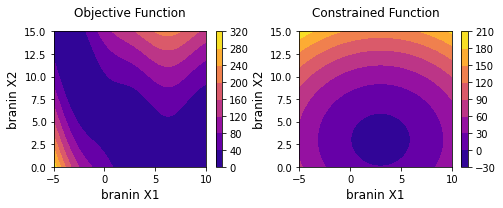

In [14]:
import GPy
from GPy.models import GPRegression

import matplotlib.pyplot as plt
import numpy as np
# Test Functions
from emukit.test_functions import sixhumpcamel_function, branin_function

from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

# Model Wrappers
from emukit.model_wrappers import GPyModelWrapper
from emukit.model_wrappers.gpy_quadrature_wrappers import BaseGaussianProcessGPy, RBFGPy
import warnings
#warnings.filterwarnings('ignore')

# Decision loops 
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop,\
                                               UnknownConstraintBayesianOptimizationLoop
from emukit.core.loop import UserFunctionResult

# Acquisition functions 
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility

from emukit.core.acquisition import IntegratedHyperParameterAcquisition
from emukit.experimental_design.acquisitions import ModelVariance
# Acquistions optimizers
from emukit.core.optimization import GradientAcquisitionOptimizer
# Stopping conditions
from emukit.core.loop import FixedIterationsStoppingCondition
from emukit.core.loop import ConvergenceStoppingCondition

### Define the objective function
### In this case we use the Branin function available in Emukit.
obj_fcn = 'branin'
if obj_fcn == 'six_hump':
    f, parameter_space = sixhumpcamel_function()
    def fc(x):#sixhumpcamel constraints
        return np.transpose([((x[:,0]-0.1)**2+(x[:,1]+0.6)**2-0.16)])+(np.random.random(1)-0.5)/10
elif obj_fcn == 'branin':
    f, parameter_space = branin_function()
    def fc(x):    #branin constraints 
        return np.transpose([((x[:,0]-3)**2+(x[:,1]-3)**2-9)])+(np.random.random(1)-0.5)*4
else:
    raise ValueError('Need to eitherdefine an objective function and its constraint functions'
                     'Or, use external X and Y inputs iteratively')

plot_true_functions(parameter_space.get_bounds(), f, fc)

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total sample no. 10


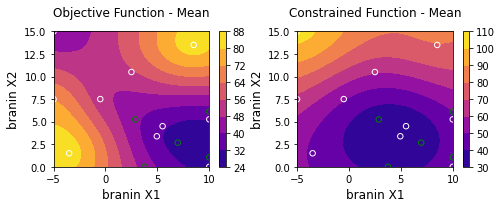

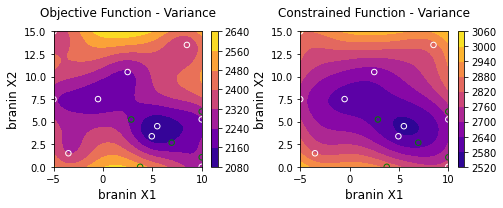

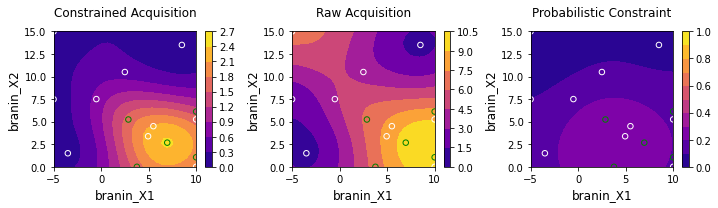

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total sample no. 20


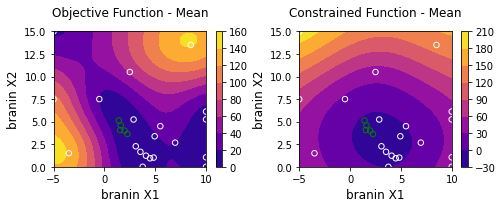

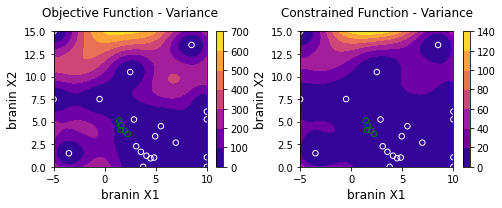

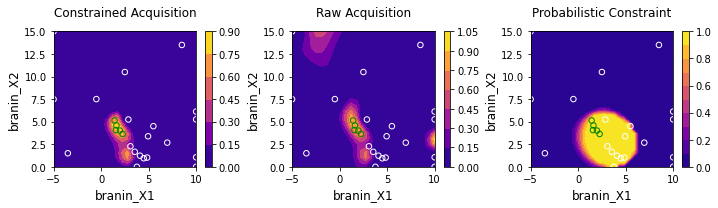

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total sample no. 30


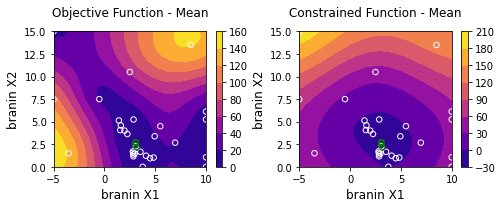

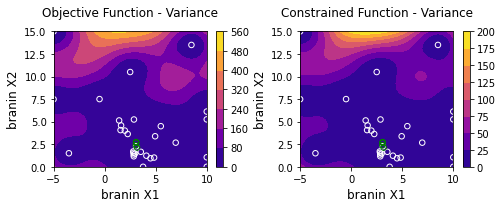

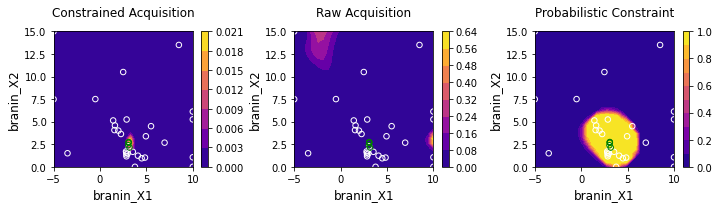

In [19]:
num_init_points = 5
#pre-sampling of objective function
design = LatinDesign(parameter_space)
x_init = design.get_samples(num_init_points)
y_init = f(x_init)

#pre-sampling of constraint function
xc_init = x_init
yc_init = fc(xc_init)

X, Y, Xc, Yc = [x_init, y_init, xc_init, yc_init]
acq_val, acq_fcn, acq_cons = [[],[],[]]
n_iterations = 5
batch = 5
for i in range(n_iterations+1):
    
    input_dim = len(X[0])
    ker = GPy.kern.Matern52(input_dim = input_dim, ARD =False)#
    ker.lengthscale.constrain_bounded(1e-5, 100.1)
    ker.variance.constrain_bounded(1e-5, 1000.1)
    ker += GPy.kern.Bias(input_dim = input_dim)
    model_gpy = GPRegression(X , Y, ker)
    #     model_gpy.kern.set_prior(GPy.priors.Uniform(0,5))
    #     model_gpy.likelihood.variance.constrain_fixed(0.1)
    model_gpy.randomize()
    model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)
    objective_model = GPyModelWrapper(model_gpy)

    # Make GPy constraint model
    ker = GPy.kern.Matern52(input_dim = len(Xc[0]), ARD =False)
    ker.lengthscale.constrain_bounded(1e-5, 1000.1)
    ker.variance.constrain_bounded(1e-5, 1000.1) 
    ker += GPy.kern.Bias(input_dim = input_dim)
    gpy_constraint_model = GPRegression(Xc, Yc, ker)
    gpy_constraint_model.randomize()
    gpy_constraint_model.optimize_restarts(num_restarts=20,verbose =False, messages=False) 
    constraint_model = GPyModelWrapper(gpy_constraint_model)

    ## Expeceted Improvement (EI)
    acquisition = ExpectedImprovement(objective_model, jitter=.01)
    ## Lower Confidence Bound (LCB)
    #acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)

    ## fully integreated acquisition
    #     acquisition_generator = lambda m: ExpectedImprovement(m, jitter=.01)
    #     expected_improvement_integrated = IntegratedHyperParameterAcquisition(objective_model, acquisition_generator)
    #     acquisition = expected_improvement_integrated

    # Make loop and collect points
    bayesopt_cons = UnknownConstraintBayesianOptimizationLoop(model_objective=objective_model, 
                                                          space=parameter_space, 
                                                          acquisition=acquisition,
                                                          model_constraint=constraint_model,
                                                          batch_size = batch)
    
    X_new = bayesopt_cons.candidate_point_calculator.compute_next_points(bayesopt_cons.loop_state)
    
    Y_new = f(X_new) # replace by new experiment results
    Xc_new = X_new
    Yc_new = fc(X_new) # replace by new experiment results
    
    f_cons_acq = bayesopt_cons.candidate_point_calculator.acquisition.acquisition.evaluate
    f_raw_acq = bayesopt_cons.candidate_point_calculator.acquisition.acquisition.acquisition_1.evaluate
    f_cons_pr = bayesopt_cons.candidate_point_calculator.acquisition.acquisition.acquisition_2.evaluate
    
    acq_product_iter = f_cons_acq(X_new)
    acq_fcn_iter = f_raw_acq(X_new)
    acq_cons_iter = f_cons_pr(X_new)
    acq_val.append(acq_product_iter)
    acq_fcn.append(acq_fcn_iter)
    acq_cons.append(acq_cons_iter)
    #print(acq_val)
    param_bound = parameter_space.get_bounds()
    f_obj =  objective_model.model.predict
    f_cons = constraint_model.model.predict
    if len(bayesopt_cons.loop_state.X)%10 == 0:
        print('total sample no.', len(bayesopt_cons.loop_state.X))
        plot_gp_functions(param_bound, f_obj, f_cons, X, Xc, X_new)
        plot_acquisitions(param_bound, f_cons_acq, f_raw_acq, f_cons_pr, X, Xc, X_new)    
    
    X = np.concatenate([X, X_new])
    Y = np.concatenate([Y, Y_new])
    Xc = np.concatenate([Xc, Xc_new])
    Yc = np.concatenate([Yc, Yc_new])

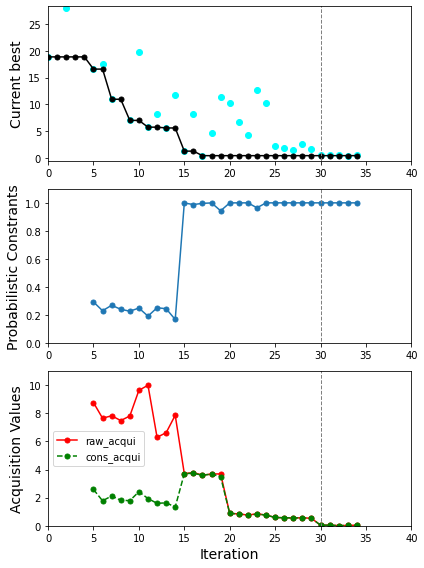

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(6,8))
font_size = 14
marker_size = 5
ax[0].plot(np.arange(len(Y)), np.minimum.accumulate(Y), 
           marker = 'o', ms = marker_size, c = 'black')
ax[0].scatter(np.arange(len(Y)), Y, c = 'cyan')

ax[0].set_ylabel('Current best', fontsize = font_size)

ax[0].set_xlim(0, len(Y)+5)
ax[0].set_ylim(min(np.minimum.accumulate(Y))-1, 
               np.max(np.minimum.accumulate(Y))+abs(np.max(np.minimum.accumulate(Y)))*0.5)

ax[1].plot(np.arange(len(Y)-num_init_points)+num_init_points, np.concatenate(acq_cons), 
          marker = 'o', ms = marker_size)
ax[1].set_ylabel('Probabilistic Constrants', fontsize = font_size)
ax[1].set_xlim(0, len(Y)+5)
ax[1].set_ylim(0, 1.1)


ax[2].plot(np.arange(len(Y)-num_init_points)+num_init_points, np.concatenate(acq_fcn), 
           marker = 'o', ms = marker_size, c = 'red', label = 'raw_acqui')
ax[2].plot(np.arange(len(Y)-num_init_points)+num_init_points, np.concatenate(acq_val),'--', 
           marker = 'o', ms = marker_size,c = 'green', label = 'cons_acqui')
ax[2].set_ylabel('Acquisition Values', fontsize = font_size)
ax[2].set_xlabel('Iteration', fontsize = font_size)
ax[2].set_xlim(0, len(Y)+5)
ax[2].set_ylim(0, np.max(acq_fcn)*1.1)
ax[2].legend()

ax[2].set_xlim(0, len(Y)+5)
fig.tight_layout()

for a in ax:
    a.plot(np.ones(1000)*(num_init_points+batch*(n_iterations)), np.arange(1000)-500, '--', linewidth = 1, color = 'gray' )

plt.show()
